In [9]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn.cluster import KMeans

import clustergraph.clustergraph as cg
import clustergraph.distances as d
import clustergraph.plotting as cp



%matplotlib widget

iris = load_iris() 
headers_iris = iris['target_names']
X = iris['data']

### KMeans

In [5]:
model_KM = KMeans(15)
prediction_KM =model_KM.fit_predict(X)

# Get the clusters from the predictions
clusters = cg.get_clusters_from_scikit(prediction_KM)

C:\Users\mathi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### ClusterGraph creation

Central Vertice 6
Farthest away Vertice 10
Vertices and size {1: 21, 2: 11, 3: 7, 4: 11, 5: 7, 6: 11, 7: 9, 8: 15, 9: 7, 10: 4, 11: 4, 12: 9, 13: 18, 14: 5, 15: 11}


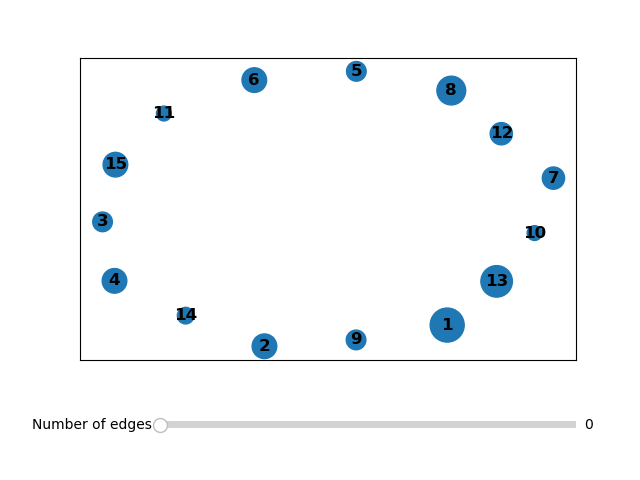

In [12]:
# Creation of the distance_between_clusters object
distance_clusters_ = d.Creation_distances( clusters = clusters, X = X).get_distance_cluster()
  
# Creation of the object
cluster_g = cg.ClusterGraph(distance_clusters_)


# Compute the distances between all the clusters
cluster_g.distances_clusters()

%matplotlib widget
keep = cp.draw_distances_graph( cluster_g.graph )

### Comparison between two ClusterGraph

In [15]:
title_left = 'ClusterGraph 1'
title_right ='ClusterGraph 2'

# Labels to color the plot
X_target = np.array(prediction_KM)

# CHOICE FIRST GRAPH
info_1 = cluster_g.graph 
number_edges_wanted_1 = 11


# CHOICE SECOND GRAPH
info_2 = cluster_g.graph 
number_edges_wanted_2 = 21


cp.show_graphs(  info_1 , nb_edges_1 = number_edges_wanted_1, nb_edges_2 = number_edges_wanted_2 , info_graph_2 = info_2,
               title_left=title_left , title_right = title_right , 
               # The typ of plot we want it could be "points_covered"
               choice_col_type = 'labels', 
               labels_col = X_target ,
                font_size_edges_labels = '10px', MIN_SCALE = 10, MAX_SCALE =40 ) 